Problem 2 \
Everything clear here

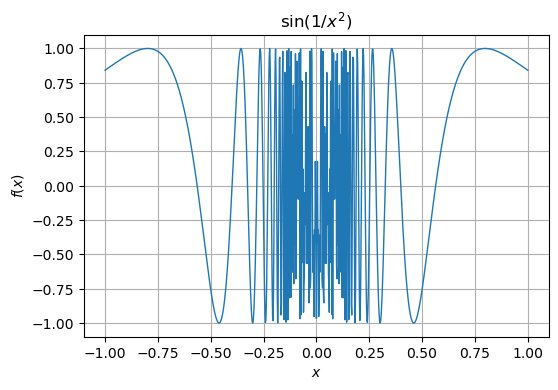

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##define favorite function
def f(x):
    return np.sin(1/x**2)

##set domain 
x = np.linspace(-1,1,1000)

##plot function
plt.figure(dpi=100)
plt.grid()
plt.title("$\sin(1/x^2)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.plot(x,f(x),lw=1)



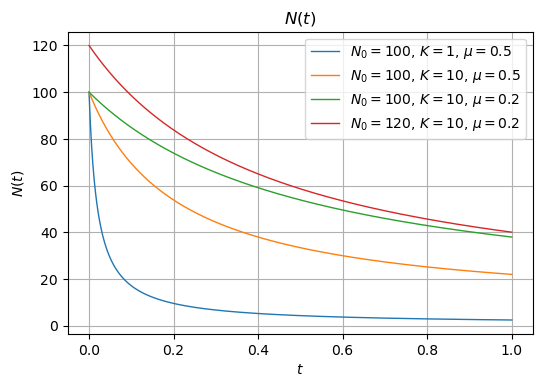

In [2]:
#define function for population growth
def N(t,N0,K,mu):
    return K / (1+ (K/N0-1)*np.exp(-mu*t))

#set domain
t = np.linspace(0,1,1000)

##plot function
plt.figure(dpi=100)
plt.grid()
plt.title("$N(t)$")
plt.xlabel("$t$")
plt.ylabel("$N(t)$")
plt.plot(t,N(t,100,1,0.5),lw=1,label = "$N_0=100$, $K=1$, $\mu=0.5$")
plt.plot(t,N(t,100,10,0.5),lw=1,label = "$N_0=100$, $K=10$, $\mu=0.5$")
plt.plot(t,N(t,100,10,0.2),lw=1,label = "$N_0=100$, $K=10$, $\mu=0.2$")
plt.plot(t,N(t,120,10,0.2),lw=1,label = "$N_0=120$, $K=10$, $\mu=0.2$")
plt.legend(loc=1)

Problem 3 \
Everything clear here

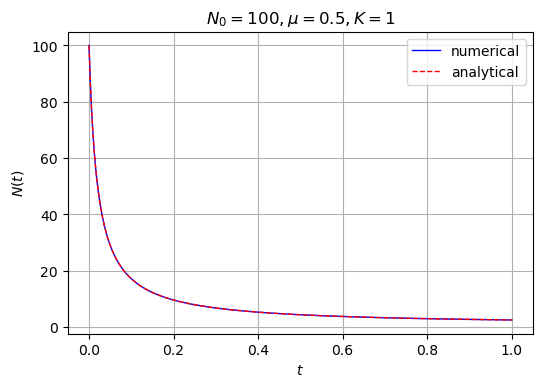

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#define constants 
N0 = 100
mu = 0.5
K = 1


#define ode
def dN(N):
    return mu*N*(1-N/K)

def ode(x,t,f=dN):
    return f(x)


#analytical function
def N(t,N0,K,mu):
    return K / (1+ (K/N0-1)*np.exp(-mu*t))

t = np.linspace(0,1,1000)
y = odeint(ode, N0, t)


##plot function
plt.figure(dpi=100)
plt.grid()
plt.title("$N_0={},\mu={},K={}$".format(N0,mu,K))
plt.xlabel("$t$")
plt.ylabel("$N(t)$")
plt.plot(t,y,lw=1,label = "numerical",color = 'b')
plt.plot(t,N(t,N0,K,mu),'--',lw=1,label = "analytical",color = 'r')
plt.legend(loc=1)

Problem 5

a)\
Everything clear here

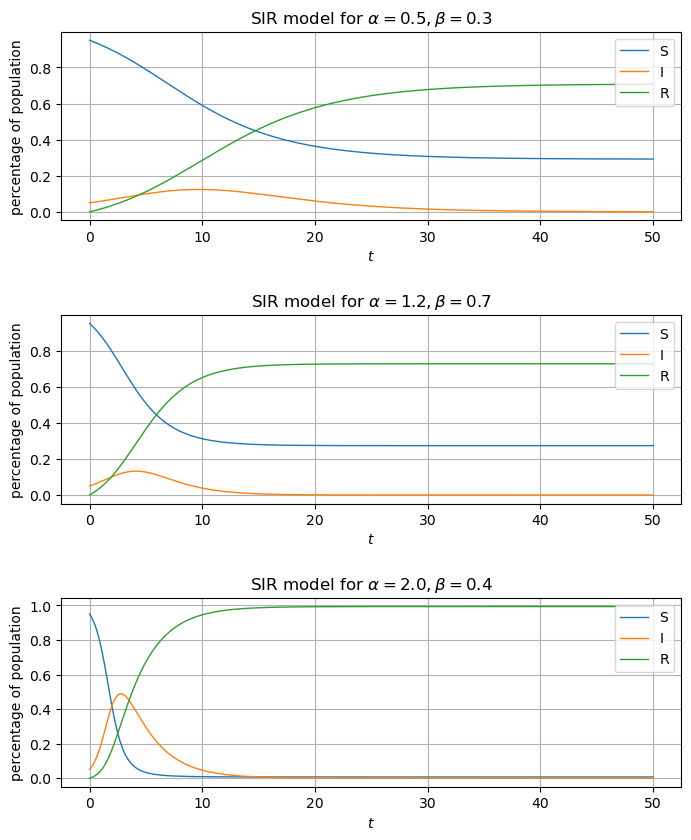

In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


##constants
alph = [0.5,1.2,2.0]
bet = [0.3,0.7,0.4]

def sir(y,t):
    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]

y0 = [0.95,0.05,0]
t = np.linspace(0,50,1000)


fig, axs = plt.subplots(3, figsize=(8,10), dpi = 100)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    alpha = alph[i]
    beta = bet[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title(r"SIR model for $\alpha={}, \beta = {}$".format(alpha,beta))


b)
Everything clear here

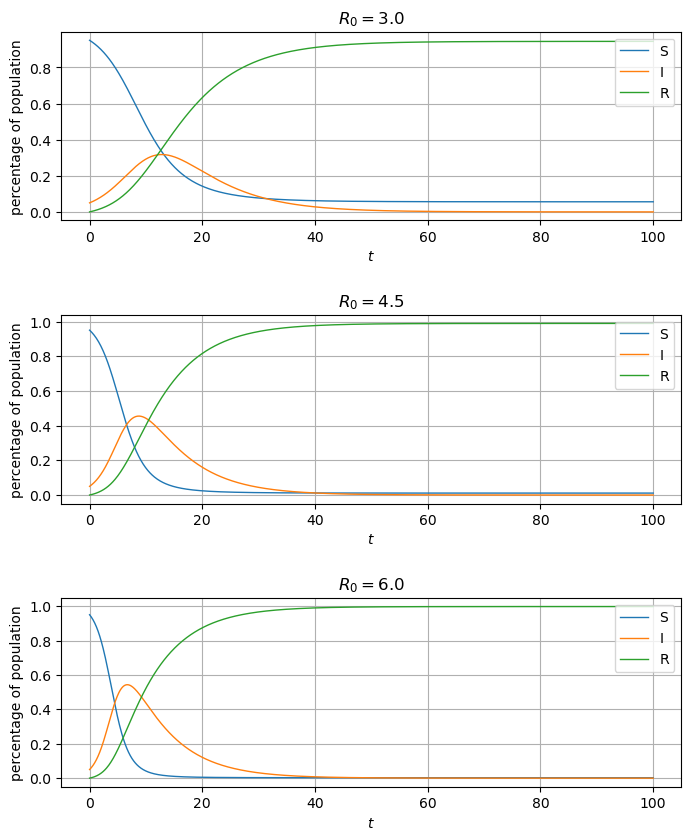

In [5]:
#keep beta fixed and vary alpha
beta = 0.14
R0 = np.array([3,4.5,6])
y0 = [0.95,0.05,0]
t = np.linspace(0,100,1000)


def sir(y,t):

    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]

fig, axs = plt.subplots(3, figsize=(8,10), dpi = 100)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    alpha = beta * R0[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title("$R_0={}$".format(R0[i]))

c)
Everything clear here

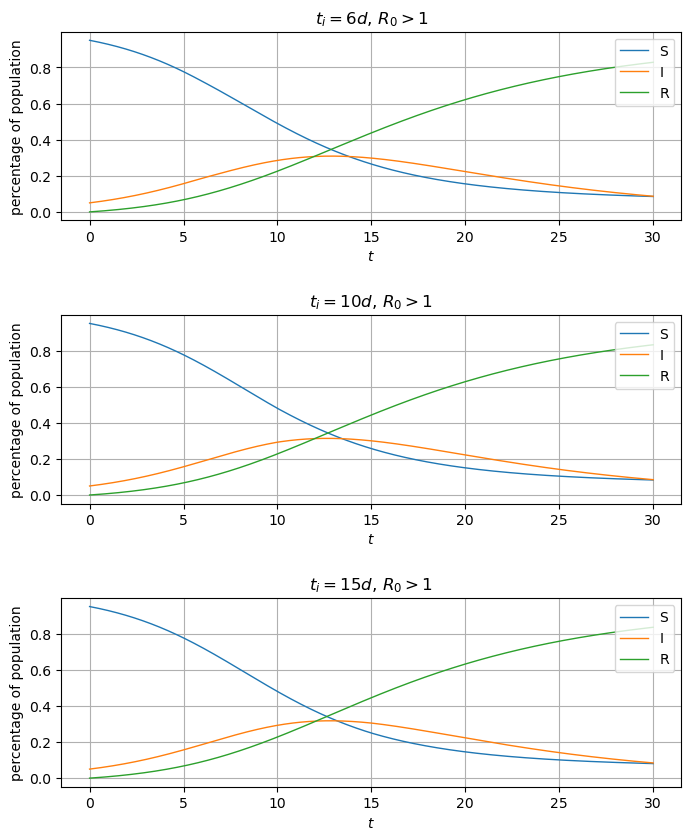

In [9]:
beta = 0.14
##first consider intervention that keeps R0 above 1, eg alpha > 0.14
y0 = [0.95,0.05,0]
t = np.linspace(0,30,1000)
inter = [6,10,15] ##times of intervention

def sir(y,t):
    if(t < tint):
        alpha = 3 * beta
    else:
        alpha = 2.9 * beta
    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]


fig, axs = plt.subplots(3, figsize=(8,10), dpi = 100)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    tint = inter[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title("$t_i={}d$, $R_0>1$".format(tint))

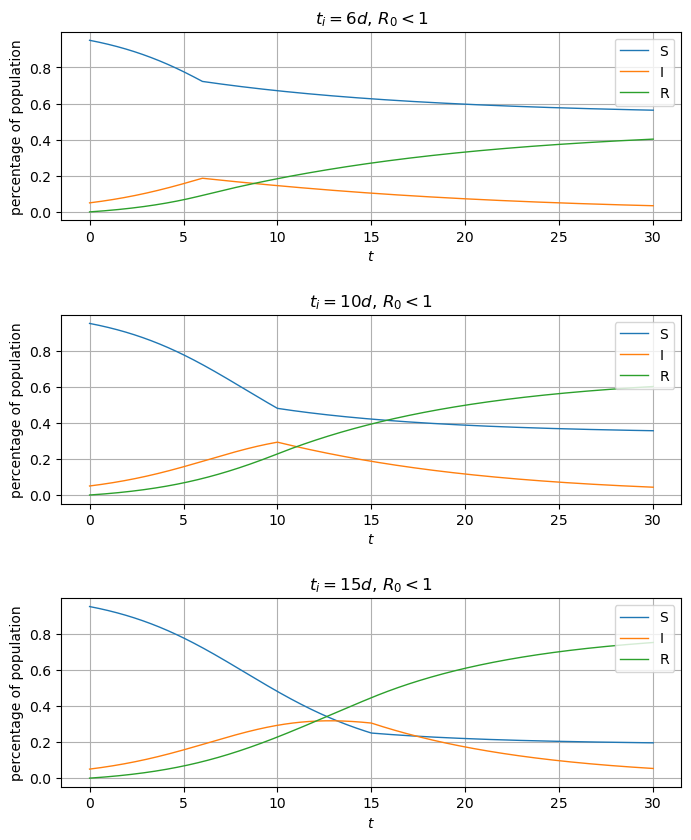

In [7]:
##now consider intervention that decreases R0 below 1, eg alpha < 0.14

beta = 0.14
y0 = [0.95,0.05,0]
t = np.linspace(0,30,1000)
inter = [6,10,15] ##times of intervention

def sir(y,t):
    if(t < tint):
        alpha = 3 * beta
    else:
        alpha = 0.8 * beta
    dx = -alpha*y[0]*y[1]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1]
    return [dx,dy,dz]


fig, axs = plt.subplots(3, figsize=(8,10), dpi = 100)
plt.subplots_adjust(hspace = 0.5)



for i in range(3):
    tint = inter[i]
    y = odeint(sir, y0, t).T
    axs[i].grid()
    axs[i].set_ylabel("percentage of population")
    axs[i].set_xlabel("$t$")
    axs[i].plot(t, y[0], lw = 1, label = 'S')
    axs[i].plot(t, y[1], lw = 1, label = 'I')
    axs[i].plot(t, y[2], lw = 1, label = 'R')
    axs[i].legend(loc = "upper right")
    axs[i].set_title("$t_i={}d$, $R_0<1$".format(tint))

d)\
Not so clear, I felt a little adventurous but I'm not sure if my modification to account for vaccinations done during the epidemic makes any sense.

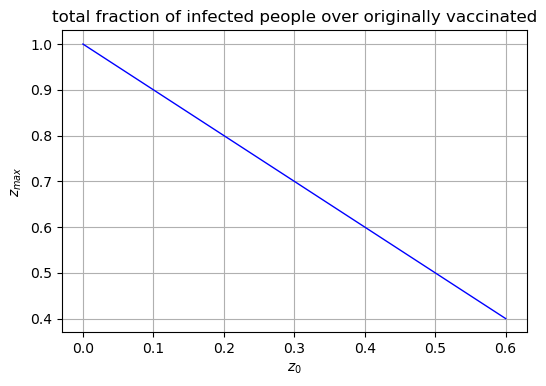

In [22]:
##first consider the simple case that vaccinations only happen before the epidemic
beta = 0.14
alpha = 2
tmax = 100 ##time after which we assume convergence
num = 100 ##number of runs
t = np.linspace(0,tmax,1000)
y0 = 0.05  #fraction of people originally infected
z0 = np.linspace(0,0.6,num) ##fraction of people originally vaccinated
zmax = np.array([]) ##number of recovered people after the epidemic

for i in range(num):
    x0 = 1-y0-z0[i]
    init = [x0,y0,z0[i]] ##initial values
    y = odeint(sir, init, t).T
    zmax = np.append(zmax,y[2,-1]-z0[i]) ##people in the R group minus the originally vaccinated ones give the total fraction of people that were infected

##plot function
plt.figure(dpi=100)
plt.grid()
plt.title("total fraction of infected people over originally vaccinated")
plt.xlabel("$z_0$")
plt.ylabel("$z_{max}$")
plt.plot(z0,zmax,lw=1,color = 'b')

One can see that for $z_0<0.3$, the total fraction of people that were infected decreases linearly with the fraction of originally vaccinated people. After that point, the decrease slows down. To keep the recovered fraction below 20%, more than 50% should be vaccinated.

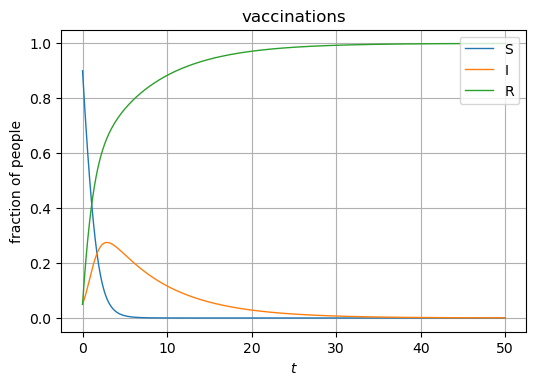

In [23]:
##now we assume that the fraction of people vaccinated grows linearly 
##vaccination means switching from S to R inmediately
beta = 0.14
alpha = 2
vacc = 0.5 ##vaccination rate
t = np.linspace(0,50,1000)
y0 = 0.05  #fraction of people originally infected
z0 = 0.05 ##fraction of people originally vaccinated
x0 = 1-y0-z0 ##fraction of people in S group

def sir(y,t):
    dx = -alpha*y[0]*y[1] - vacc * y[0]
    dy = alpha*y[0]*y[1] - beta*y[1]
    dz = beta*y[1] + vacc * y[0]
    return [dx,dy,dz]

y = odeint(sir, [x0,y0,z0], t).T

##plot function
plt.figure(dpi=100)
plt.grid()
plt.title("vaccinations")
plt.xlabel("$t$")
plt.ylabel("fraction of people")
plt.plot(t, y[0], lw = 1, label = 'S')
plt.plot(t, y[1], lw = 1, label = 'I')
plt.plot(t, y[2], lw = 1, label = 'R')
plt.legend(loc=1)


Problem 8

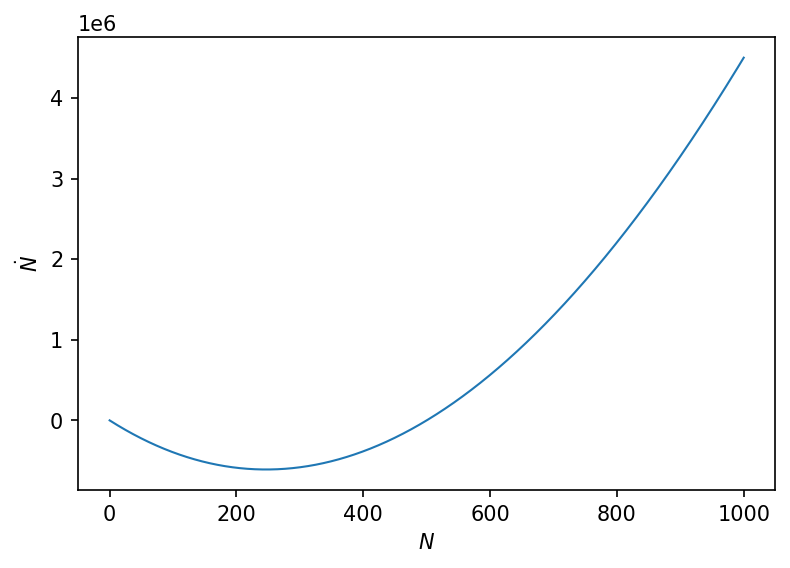

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = np.linspace(0,1000,10000)
r = 10#growth rate
a = 500 #population below which it goes extinct
K = 10000 ##limit

def Ndot(N):
    return r*N*(N-a)*(1-N/K)

plt.figure(dpi=150)
plt.xlabel("$N$")
plt.ylabel("$\dot{N}$")
plt.plot(N,Ndot(N),lw=1)